In [47]:
# Importing modules
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

np.random.seed(42)

# 3 Year all NBA dataset
year = 10
train = pd.read_csv('train_%dyr.csv' % year)
test = pd.read_csv('test_%dyr.csv' % year)

## Take a peak in the dataset

In [48]:
train.head()

Unnamed: 0  idPlayerNBA     namePlayer  yearSeason  yearSeasonFirst  \
0           1          386   Elliot Perry        1992             1992   
1           2        76016   Mark Aguirre        1982             1982   
2           3        78392     Wes Unseld        1969             1969   
3           4          688  Michael Curry        1994             1994   
4           5         2744   Al Jefferson        2005             2005   

   yearsPlayed  maxYrsPlayed groupPosition  AllNBA10yr  agePlayer     ...      \
0            0            10             G           0         22     ...       
1            0            12             F           0         22     ...       
2            0            12             C           1         22     ...       
3            0            11             G           0         25     ...       
4            0            13             F           1         20     ...       

  drbTotals  trbTotals  astTotals  stlTotals  blkTotals  tovTotals  pfTotals  \
0        25         39         78         34          3         50        36   
1       160        249        164         37         22        135       152   
2         0       1491        213          0          0          0       276   
3         1          1          1          1          0          3         6   
4       193        312         24         22         55         66       195   

   ptsTotals  countTeamsPlayerSeasonTotals  minpergame  
0        126                             1    8.740000  
1        955                             1   28.784314  
2       1131                             1   36.219512  
3          9                             1    4.300000  
4        475                             1   14.802817  

[5 rows x 60 columns]

In [49]:
train.columns

Index(['Unnamed: 0', 'idPlayerNBA', 'namePlayer', 'yearSeason',
       'yearSeasonFirst', 'yearsPlayed', 'maxYrsPlayed', 'groupPosition',
       'AllNBA10yr', 'agePlayer', 'slugTeamBREF', 'countGames', 'minutes',
       'ratioPER', 'pctTrueShooting', 'pct3PRate', 'pctFTRate', 'pctORB',
       'pctDRB', 'pctTRB', 'pctAST', 'pctSTL', 'pctBLK', 'pctTOV', 'pctUSG',
       'ratioOWS', 'ratioDWS', 'ratioWS', 'ratioWSPer48', 'ratioOBPM',
       'ratioDBPM', 'ratioBPM', 'ratioVORP', 'countTeamsPlayerSeason',
       'countGamesStarted', 'pctFG', 'pctFG3', 'pctFG2', 'pctEFG', 'pctFT',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals',
       'minpergame'],
      dtype='object')

In [50]:
print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)

Training Data Shape: (532, 60)
Testing Data Shape: (177, 60)


In [51]:
train['AllNBA10yr'].value_counts()

0    422
1    110
Name: AllNBA10yr, dtype: int64

In [52]:
cat_columns = ['groupPosition', 'slugTeamBREF']

columns = ['maxYrsPlayed', 'agePlayer', 'countGames', 'minutes',
       'ratioPER', 'pctTrueShooting', 'pct3PRate', 'pctFTRate', 'pctORB',
       'pctDRB', 'pctTRB', 'pctAST', 'pctSTL', 'pctBLK', 'pctTOV', 'pctUSG',
       'ratioOWS', 'ratioDWS', 'ratioWS', 'ratioWSPer48', 'ratioOBPM',
       'ratioDBPM', 'ratioBPM', 'ratioVORP', 'countTeamsPlayerSeason',
       'countGamesStarted', 'pctFG', 'pctFG3', 'pctFG2', 'pctEFG', 'pctFT',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals',
       'minpergame']




In [53]:
# X_train = np.array(train.loc[:, columns])
# X_test = np.array(test.loc[:, columns])

# y_train = np.array(train.loc[:, 'AllNBA%dyr' % year])
# y_test = np.array(test.loc[:, 'AllNBA%dyr' % year])

In [54]:
indexes = list(train[train['AllNBA10yr'] == 1].index)
indexes.extend(list(np.random.choice(list(train[train['AllNBA10yr'] == 0].index), 110, replace=False)))


X_train = np.array(train.loc[indexes, columns])
X_test = np.array(test.loc[:, columns])

y_train = np.array(train.loc[indexes, 'AllNBA%dyr' % year])
y_test = np.array(test.loc[:, 'AllNBA%dyr' % year])

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(220, 51)
(177, 51)
(220,)
(177,)


In [56]:
print((y_train==0).sum())
print((y_test==0).sum())

110
133


## Feature Selection

### Creating DataFrames to save the results

In [57]:
classifier_names = ['Ridge', 'Logistic (L1 Norm)', 'Logistic (L2 Norm)', 'SVM_Linear', 'SVM_Poly (degree 3)', 'SVM_RBF', 'NBC', 'LDA', 'QDA']
Results_df = pd.DataFrame(index=classifier_names, columns=['In-Sample Accuracy', 'Out-Sample Accuracy'], dtype=np.float)

### Using Ridge (L2 Regularization - Not Scale invariant)

In [58]:
from sklearn.linear_model import RidgeClassifierCV
"""
By default, RidgeClassifierCV performs Generalized Cross-Validation, 
which is a form of efficient Leave-One-Out cross-validation.
"""
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Create Ridge Classifier with possible alpha values
ridge_lambdas = np.arange(0.1, 200, 0.1)
clf_Ridge_CV = RidgeClassifierCV(alphas=ridge_lambdas, cv=5)

# Fit the Ridge Classifier
clf_Ridge_CV.fit(X_train_std, y_train)

print('Selected Lambda Value for Ridge Model:', clf_Ridge_CV.alpha_)

Selected Lambda Value for Ridge Model: 199.9


### Performing Ridge Classification for Feature Selection

In [59]:
from sklearn.linear_model import RidgeClassifier
clf_Ridge = RidgeClassifier(alpha=clf_Ridge_CV.alpha_)

clf_Ridge.fit(X_train_std, y_train)

y_pred = clf_Ridge.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_Ridge.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))


Results_df.loc['Ridge', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_Ridge.predict(X_train_std))
Results_df.loc['Ridge', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8090909090909091
Out-Sample Accuracy 0.6440677966101694


In [60]:
Ridge_coeff_df = pd.DataFrame(index=columns, data=clf_Ridge.coef_.reshape(-1,1), columns=['Ridge Coefficient'])

In [61]:
Ridge_coeff_df

Ridge Coefficient
maxYrsPlayed                           0.121777
agePlayer                             -0.090010
countGames                            -0.024940
minutes                               -0.004163
ratioPER                               0.022275
pctTrueShooting                        0.003768
pct3PRate                             -0.008699
pctFTRate                              0.029502
pctORB                                -0.021657
pctDRB                                -0.013411
pctTRB                                -0.026637
pctAST                                -0.016818
pctSTL                                -0.027115
pctBLK                                -0.064846
pctTOV                                -0.048207
pctUSG                                -0.045716
ratioOWS                               0.037337
ratioDWS                               0.060643
ratioWS                                0.051637
ratioWSPer48                           0.045620
ratioOBPM                              0.031303
ratioDBPM                             -0.006928
ratioBPM                               0.023595
ratioVORP                              0.032608
countTeamsPlayerSeason                 0.000000
countGamesStarted                      0.028308
pctFG                                 -0.004144
pctFG3                                -0.053327
pctFG2                                -0.002679
pctEFG                                -0.011675
pctFT                                  0.047350
minutesTotals                         -0.004163
fgmTotals                              0.014806
fgaTotals                              0.018760
fg3mTotals                             0.019824
fg3aTotals                             0.033287
fg2mTotals                             0.012401
fg2aTotals                             0.013247
ftmTotals                              0.013067
ftaTotals                              0.022116
orbTotals                              0.014318
drbTotals                             -0.003330
trbTotals                             -0.003195
astTotals                              0.050552
stlTotals                             -0.002008
blkTotals                             -0.016197
tovTotals                              0.023737
pfTotals                              -0.005274
ptsTotals                              0.015579
countTeamsPlayerSeasonTotals           0.000000
minpergame                             0.038574

## Using Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic with L1 Norm (Lasso)
clf_LogReg_L1Norm_CV = LogisticRegressionCV(Cs=100, cv=5, penalty='l1', solver='saga')
clf_LogReg_L2Norm_CV = LogisticRegressionCV(Cs=100, cv=5, penalty='l2')
# Fit the linear regression
clf_LogReg_L1Norm_CV.fit(X_train_std, y_train)
clf_LogReg_L2Norm_CV.fit(X_train_std, y_train)

C:\Users\Agam\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [63]:
print('Selected C Value for Logistic Regression (L1 Norm Penalty) Model:', clf_LogReg_L1Norm_CV.C_[0])
print('Selected C Value for Logistic Regression (L2 Norm Penalty) Model:', clf_LogReg_L2Norm_CV.C_[0])

Selected C Value for Logistic Regression (L1 Norm Penalty) Model: 0.6280291441834259
Selected C Value for Logistic Regression (L2 Norm Penalty) Model: 0.1176811952434999


### Performing Logistic Regression for Feature Selection

In [64]:

from sklearn.linear_model import LogisticRegression

clf_LogReg_L1Norm = LogisticRegression(C=clf_LogReg_L1Norm_CV.C_[0], penalty='l1')
clf_LogReg_L1Norm.fit(X_train_std, y_train)


y_pred = clf_LogReg_L1Norm.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L1Norm.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

In-Sample Accuracy 0.8227272727272728
Out-Sample Accuracy 0.6271186440677966


In [65]:
Results_df.loc['Logistic (L1 Norm)', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L1Norm.predict(X_train_std))
Results_df.loc['Logistic (L1 Norm)', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In [66]:
LogReg_L1Norm_coeff_df = pd.DataFrame(index=columns, data=clf_LogReg_L1Norm.coef_.reshape(-1,1), columns=['Logistic (L1 norm) Coefficient'])

In [67]:
LogReg_L1Norm_coeff_df

Logistic (L1 norm) Coefficient
maxYrsPlayed                                        0.665821
agePlayer                                          -0.532899
countGames                                         -0.265391
minutes                                             0.000000
ratioPER                                            0.000000
pctTrueShooting                                     0.000000
pct3PRate                                           0.000000
pctFTRate                                           0.129216
pctORB                                             -0.028786
pctDRB                                              0.000000
pctTRB                                             -0.131608
pctAST                                             -0.020993
pctSTL                                             -0.080488
pctBLK                                             -0.355815
pctTOV                                             -0.425538
pctUSG                                             -0.321674
ratioOWS                                            0.000000
ratioDWS                                            0.373629
ratioWS                                             0.565266
ratioWSPer48                                        0.302574
ratioOBPM                                           0.270097
ratioDBPM                                          -0.052969
ratioBPM                                            0.000000
ratioVORP                                           0.000000
countTeamsPlayerSeason                              0.000000
countGamesStarted                                   0.017043
pctFG                                               0.000000
pctFG3                                             -0.383928
pctFG2                                              0.000000
pctEFG                                              0.000000
pctFT                                               0.426640
minutesTotals                                       0.000000
fgmTotals                                           0.000000
fgaTotals                                           0.000000
fg3mTotals                                          0.000000
fg3aTotals                                          0.230040
fg2mTotals                                          0.000000
fg2aTotals                                          0.000000
ftmTotals                                           0.000000
ftaTotals                                           0.000000
orbTotals                                           0.000000
drbTotals                                           0.000000
trbTotals                                          -0.258803
astTotals                                           0.173595
stlTotals                                           0.000000
blkTotals                                          -0.122960
tovTotals                                           0.631659
pfTotals                                           -0.054774
ptsTotals                                           0.000000
countTeamsPlayerSeasonTotals                        0.000000
minpergame                                          0.037890

In [68]:

clf_LogReg_L2Norm = LogisticRegression(C=clf_LogReg_L2Norm_CV.C_[0], penalty='l2')
clf_LogReg_L2Norm.fit(X_train_std, y_train)

y_pred = clf_LogReg_L2Norm.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L2Norm.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['Logistic (L2 Norm)', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L2Norm.predict(X_train_std))
Results_df.loc['Logistic (L2 Norm)', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8363636363636363
Out-Sample Accuracy 0.6497175141242938


In [69]:
LogReg_L2Norm_coeff_df = pd.DataFrame(index=columns, data=clf_LogReg_L2Norm.coef_.reshape(-1,1), columns=['Logistic (L2 norm) Coefficient'])

### Fitting SVM with Linear Kernel

In [70]:
from sklearn import svm

# SVM with Linear Kernel
clf_SVM_Linear = svm.SVC(kernel='linear')
clf_SVM_Linear.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
SVM_Linear_coeff = pd.DataFrame(index=columns, data=clf_SVM_Linear.coef_.reshape(-1,1), columns=['SVM (Linear) Coefficient'])

In [72]:
coeff_df = pd.concat([Ridge_coeff_df, LogReg_L1Norm_coeff_df, LogReg_L2Norm_coeff_df, SVM_Linear_coeff], axis=1)
coeff_df

Ridge Coefficient  \
maxYrsPlayed                           0.121777   
agePlayer                             -0.090010   
countGames                            -0.024940   
minutes                               -0.004163   
ratioPER                               0.022275   
pctTrueShooting                        0.003768   
pct3PRate                             -0.008699   
pctFTRate                              0.029502   
pctORB                                -0.021657   
pctDRB                                -0.013411   
pctTRB                                -0.026637   
pctAST                                -0.016818   
pctSTL                                -0.027115   
pctBLK                                -0.064846   
pctTOV                                -0.048207   
pctUSG                                -0.045716   
ratioOWS                               0.037337   
ratioDWS                               0.060643   
ratioWS                                0.051637   
ratioWSPer48                           0.045620   
ratioOBPM                              0.031303   
ratioDBPM                             -0.006928   
ratioBPM                               0.023595   
ratioVORP                              0.032608   
countTeamsPlayerSeason                 0.000000   
countGamesStarted                      0.028308   
pctFG                                 -0.004144   
pctFG3                                -0.053327   
pctFG2                                -0.002679   
pctEFG                                -0.011675   
pctFT                                  0.047350   
minutesTotals                         -0.004163   
fgmTotals                              0.014806   
fgaTotals                              0.018760   
fg3mTotals                             0.019824   
fg3aTotals                             0.033287   
fg2mTotals                             0.012401   
fg2aTotals                             0.013247   
ftmTotals                              0.013067   
ftaTotals                              0.022116   
orbTotals                              0.014318   
drbTotals                             -0.003330   
trbTotals                             -0.003195   
astTotals                              0.050552   
stlTotals                             -0.002008   
blkTotals                             -0.016197   
tovTotals                              0.023737   
pfTotals                              -0.005274   
ptsTotals                              0.015579   
countTeamsPlayerSeasonTotals           0.000000   
minpergame                             0.038574   

                              Logistic (L1 norm) Coefficient  \
maxYrsPlayed                                        0.665821   
agePlayer                                          -0.532899   
countGames                                         -0.265391   
minutes                                             0.000000   
ratioPER                                            0.000000   
pctTrueShooting                                     0.000000   
pct3PRate                                           0.000000   
pctFTRate                                           0.129216   
pctORB                                             -0.028786   
pctDRB                                              0.000000   
pctTRB                                             -0.131608   
pctAST                                             -0.020993   
pctSTL                                             -0.080488   
pctBLK                                             -0.355815   
pctTOV                                             -0.425538   
pctUSG                                             -0.321674   
ratioOWS                                            0.000000   
ratioDWS                                            0.373629   
ratioWS                                             0.565266   
ratioWSPer48                                        0.302574   
ratioOBPM                        

### Selecting Features

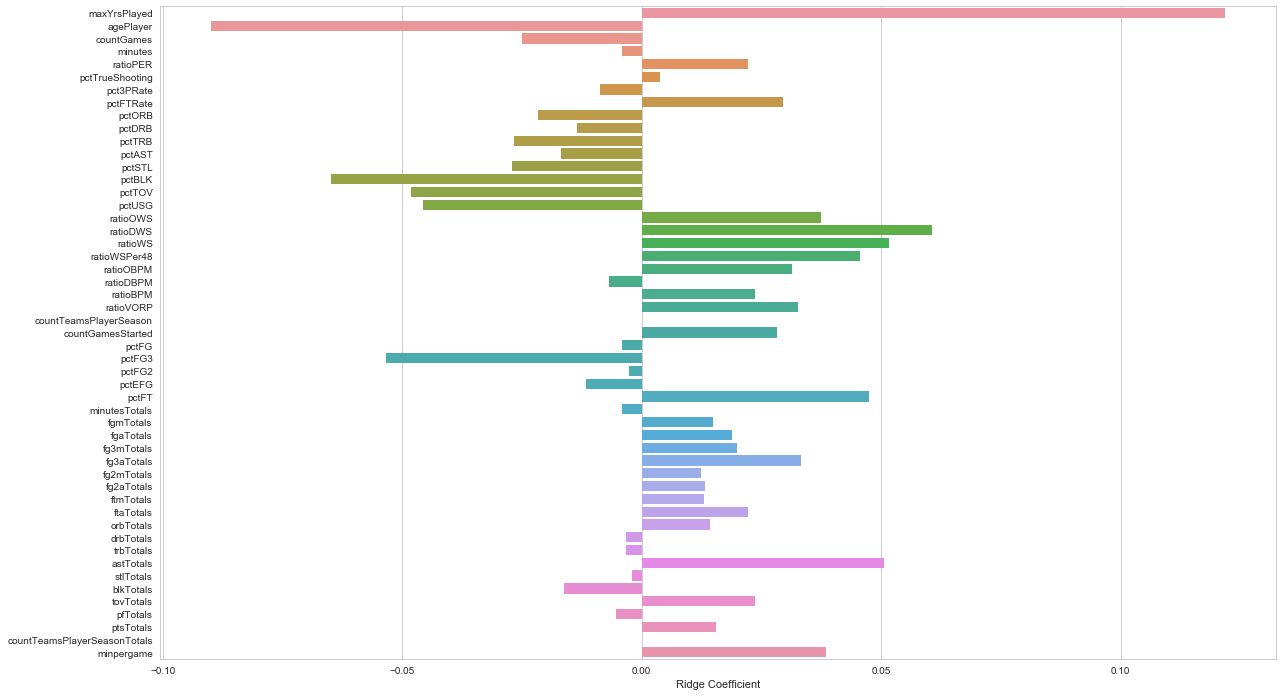

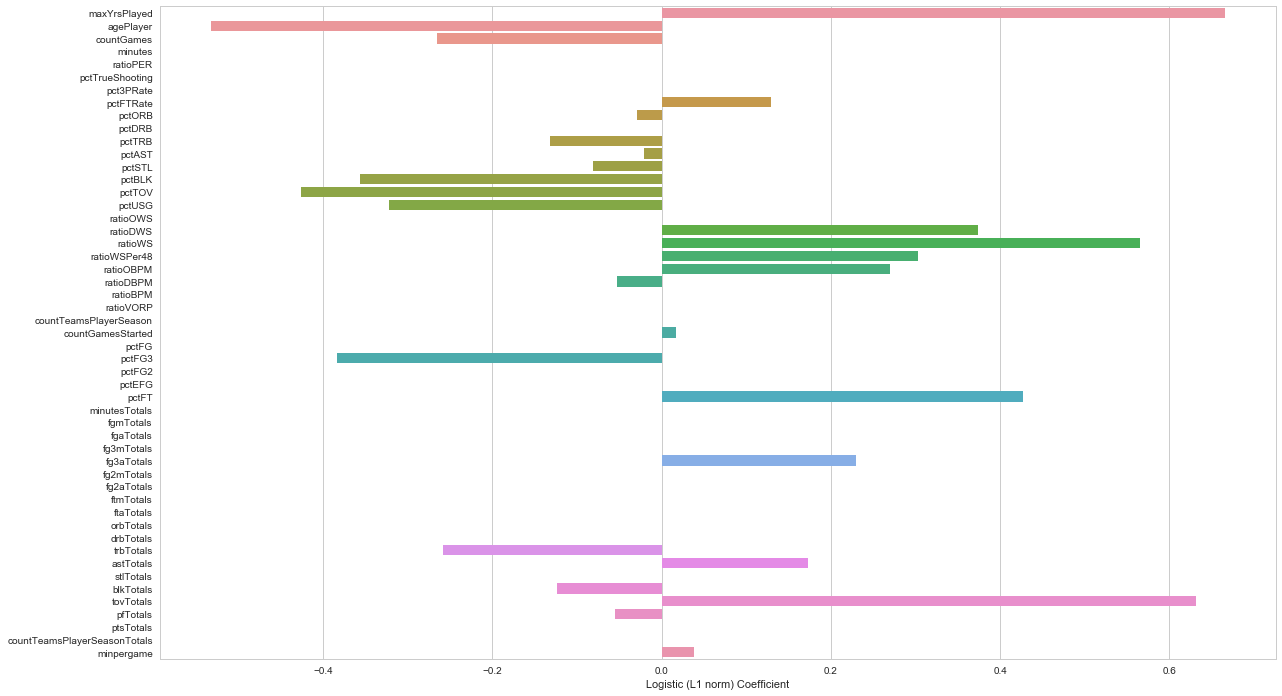

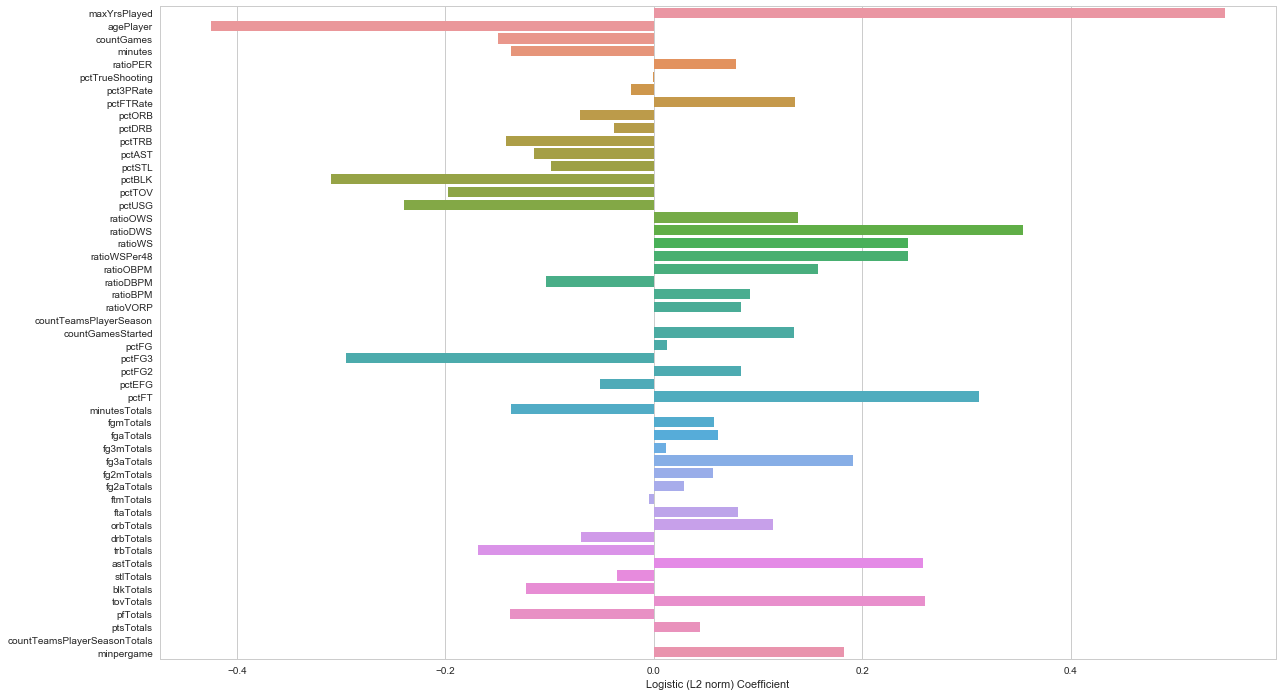

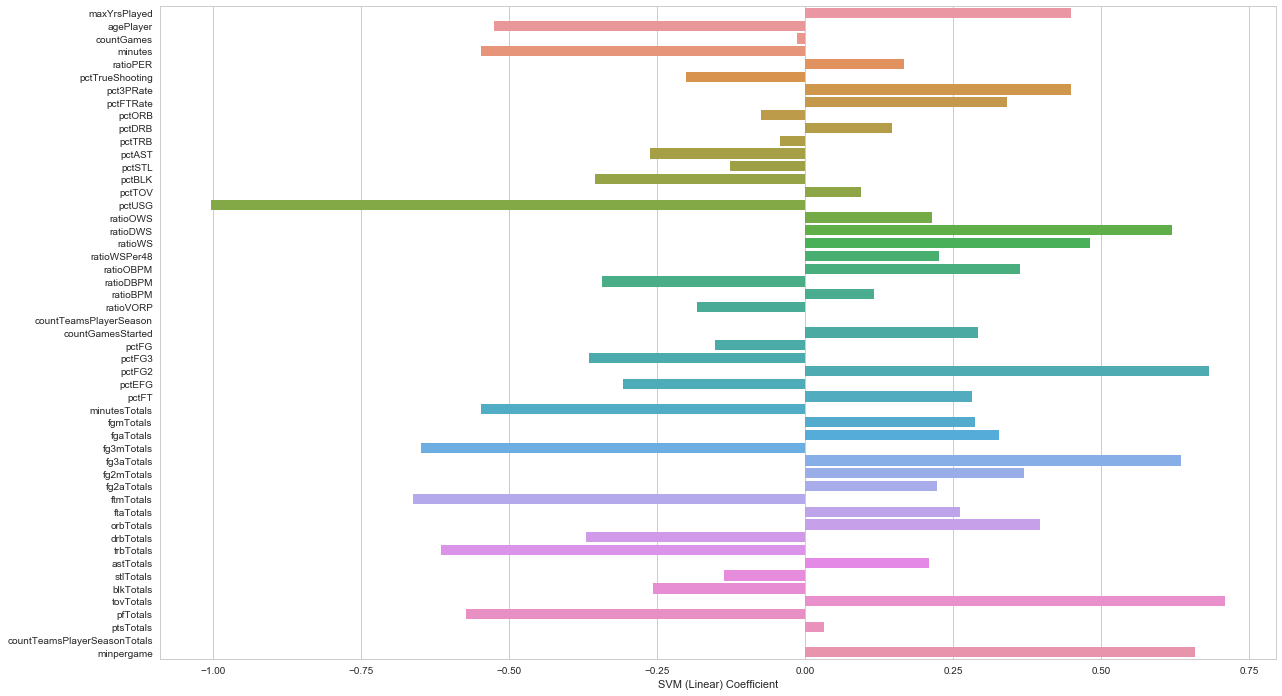

In [73]:
sns.set(style="whitegrid")

for col in coeff_df.columns:
       plt.figure(figsize=(20,12))
       sns.barplot(x=col, y=coeff_df.index, data=coeff_df)

In [74]:
selected_columns = []

## Fitting SVM with different Kernels on whole dataset

### SVM (Linear Classifier)

In [75]:
from sklearn import svm

# SVM with Linear Kernel
clf_SVM_Linear = svm.SVC(kernel='linear')
clf_SVM_Linear.fit(X_train_std, y_train)

y_pred = clf_SVM_Linear.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_Linear.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['SVM_Linear', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_Linear.predict(X_train_std))
Results_df.loc['SVM_Linear', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8545454545454545
Out-Sample Accuracy 0.6214689265536724


### SVM (Polynomial Kernel (degree 3))

In [76]:
clf_SVM_Poly = svm.SVC(kernel='poly')
clf_SVM_Poly.fit(X_train_std, y_train)


y_pred = clf_SVM_Poly.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_Poly.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['SVM_Poly (degree 3)', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_Poly.predict(X_train_std))
Results_df.loc['SVM_Poly (degree 3)', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8
Out-Sample Accuracy 0.7909604519774012


### SVM (Radial Basis Function) 

In [77]:
clf_SVM_RBF = svm.SVC(kernel='rbf')
clf_SVM_RBF.fit(X_train_std, y_train)

y_pred = clf_SVM_RBF.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_RBF.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['SVM_RBF', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_SVM_RBF.predict(X_train_std))
Results_df.loc['SVM_RBF', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8727272727272727
Out-Sample Accuracy 0.6610169491525424


## NBC 

In [78]:
from sklearn.naive_bayes import GaussianNB

clf_NB_Gaussian = GaussianNB()
clf_NB_Gaussian.fit(X_train_std, y_train)

y_pred = clf_NB_Gaussian.predict(X_test_std)

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_NB_Gaussian.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['NBC', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_NB_Gaussian.predict(X_train_std))
Results_df.loc['NBC', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.7045454545454546
Out-Sample Accuracy 0.6497175141242938


## LDA 

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf_LDA = LDA(n_components=2)

"""
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.
"""

clf_LDA.fit(X_train_std, y_train)

y_pred = clf_LDA.predict(X_test_std)

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_LDA.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['LDA', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_LDA.predict(X_train_std))
Results_df.loc['LDA', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.8272727272727273
Out-Sample Accuracy 0.5875706214689266


C:\Users\Agam\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## QDA 

In [80]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
clf_QDA = QDA()
"""
Quadratic Discriminant Analysis

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.
"""

clf_QDA.fit(X_train_std, y_train)

y_pred = clf_QDA.predict(X_test_std)

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_QDA.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Results_df.loc['QDA', 'In-Sample Accuracy'] = metrics.accuracy_score(y_true=y_train, y_pred=clf_QDA.predict(X_train_std))
Results_df.loc['QDA', 'Out-Sample Accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In-Sample Accuracy 0.9045454545454545
Out-Sample Accuracy 0.751412429378531


C:\Users\Agam\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [81]:
Results_df

In-Sample Accuracy  Out-Sample Accuracy
Ridge                          0.809091             0.644068
Logistic (L1 Norm)             0.822727             0.627119
Logistic (L2 Norm)             0.836364             0.649718
SVM_Linear                     0.854545             0.621469
SVM_Poly (degree 3)            0.800000             0.790960
SVM_RBF                        0.872727             0.661017
NBC                            0.704545             0.649718
LDA                            0.827273             0.587571
QDA                            0.904545             0.751412

## ROC Curve for classifiers

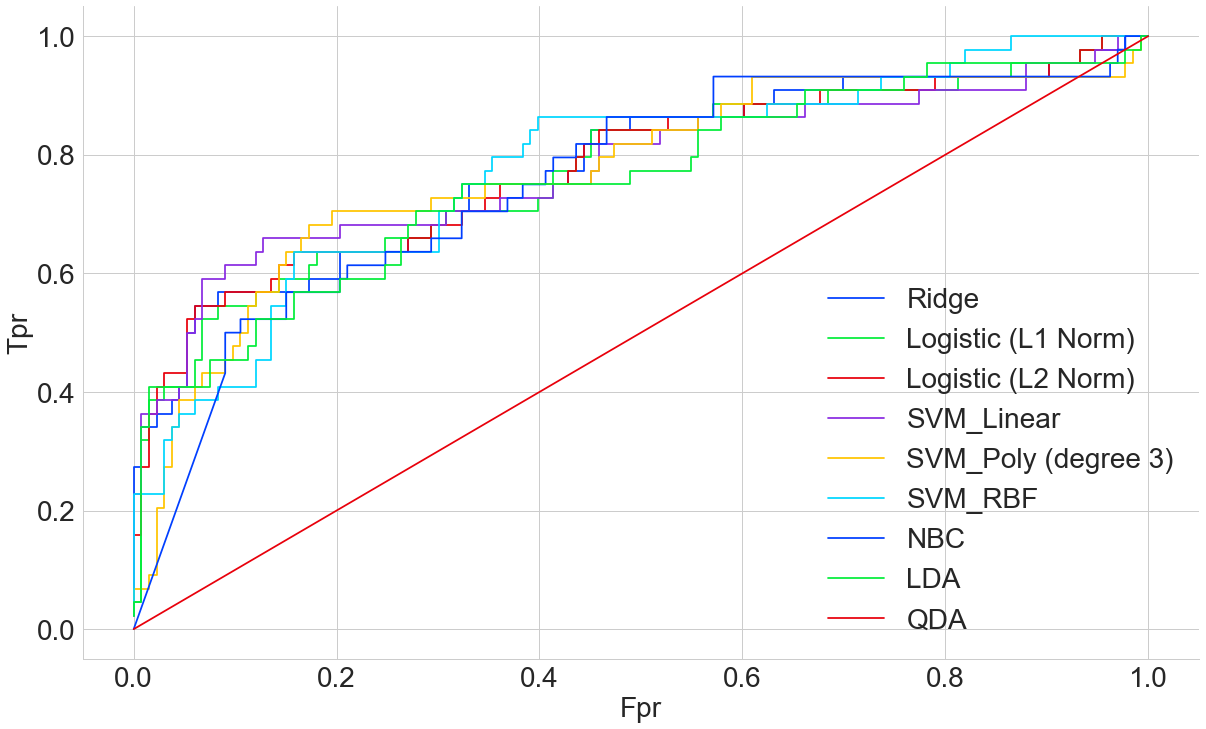

In [82]:
classifiers = [clf_Ridge, clf_LogReg_L1Norm, clf_LogReg_L2Norm, clf_SVM_Linear, clf_SVM_Poly, clf_SVM_RBF, clf_NB_Gaussian, clf_LDA, clf_QDA]
y_score_df = pd.DataFrame(columns=classifier_names, dtype=np.float)

fig = plt.figure(figsize=(20,12))
sns.set_palette('bright')
ax1 = plt.axes(frameon=True)

# removing top and right part of frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# setting ticks position
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

for idx in range(len(classifiers)):
    clf = classifiers[idx]

    if classifier_names[idx] in ['NBC', 'LDA', 'QDA']:
        y_score = clf.predict_proba(X_test_std)[:, 1]
    else:
        y_score = clf.decision_function(X_test_std)

    y_score_df.loc[:, classifier_names[idx]] = y_score

    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_score)

    plt.plot(fpr, tpr, label=classifier_names[idx])

plt.xlabel('Fpr', fontsize=28)
plt.ylabel('Tpr', fontsize=28)
plt.rc('legend', fontsize=28)
plt.tick_params(labelsize=28)
plt.legend()

In [83]:
y_score_df


Ridge  Logistic (L1 Norm)  Logistic (L2 Norm)  SVM_Linear  \
0    0.109570            0.759353            0.396216   -0.462577   
1    0.105951            0.657777            0.470992   -0.097754   
2    0.020945           -0.288951           -0.202489   -0.742280   
3   -0.636410           -2.496757           -2.237099   -2.546750   
4   -0.234754           -0.991145           -0.874247   -0.555057   
5   -0.332345           -0.742211           -0.872302   -0.690680   
6   -0.419286           -2.078905           -1.748184   -2.335640   
7   -0.140220           -0.891916           -0.757786   -0.885407   
8   -0.309482           -1.443787           -1.223290   -1.601799   
9   -0.011161           -0.007174            0.018486   -0.481009   
10  -0.442465           -1.537379           -1.436390   -0.843140   
11   0.115787            0.070979            0.173037   -0.386308   
12  -0.019888            0.005506           -0.026336    0.819164   
13  -0.573743           -1.800495           -1.744749   -1.453171   
14   0.007724           -0.032132           -0.031000    0.271362   
15  -0.098959           -0.336876           -0.258275   -0.901185   
16   0.788208            3.008830            2.903594    3.585165   
17  -0.409483           -1.669108           -1.640085   -1.879224   
18  -0.166930           -0.448729           -0.544591   -0.326015   
19  -0.547465           -2.089834           -1.500865   -0.045367   
20  -0.810500           -3.187893           -2.957344   -3.440714   
21  -0.173435           -0.563548           -0.619281   -0.367486   
22  -0.137605           -0.430608           -0.333002   -0.330678   
23   0.255115            1.235259            1.249683    1.805403   
24   0.919935            3.461380            3.446504    2.839938   
25   0.094640            0.623782            0.619547    0.874760   
26  -0.301012           -1.369565           -1.211834   -1.593440   
27   0.196593            0.077045            0.544496    1.028229   
28  -0.019171           -0.094053           -0.358106   -1.217846   
29   0.742337            2.726758            2.532946    1.901196   
..        ...                 ...                 ...         ...   
147 -0.169404            0.026898           -0.215022    0.238090   
148 -0.044796            0.057393            0.025260    0.457537   
149 -0.121528           -0.662231           -0.529576   -0.365307   
150  0.467181            1.750204            1.624664    1.356540   
151 -0.089147            0.428859            0.123922    1.091618   
152 -0.041459           -0.418436           -0.177083    0.274023   
153  0.364846            2.161852            1.537892    2.023053   
154  0.278632            1.045025            0.811951    0.592703   
155 -0.479166           -2.643373           -1.913100   -1.898952   
156  0.232533            1.210152            0.956468    1.350839   
157  0.305881            1.453511            0.885865   -0.524850   
158 -0.505602           -1.781242           -1.519711   -1.275059   
159  0.059500            0.998978            0.726767    1.278738   
160  0.460003            2.204072            1.864004    2.137634   
161  0.165820            0.145219           -0.023094   -0.624865   
162 -0.158359           -0.678652           -0.763951   -0.279813   
163  0.900371            3.106856            3.286535    4.262878   
164  0.212798            1.231751            1.144468    1.985729   
165  0.350178            0.941640            0.807710    1.455669   
166  0.047216            0.022159           -0.217560   -1.050287   
167 -0.482802           -1.185813           -1.198194   -1.220599   
168 -0.597303           -2.478604           -2.177667   -1.991767   
169 -0.120923            0.283867            0.209217    1.255656   
170 -0.059763           -0.017202           -0.045962   -0.090249   
171  0.056894            0.226568            0.351230    1.005515   
172  0.565921            2.260604            2.137106    2.483275   
173  0

In [84]:
from sklearn.metrics import roc_auc_score
for idx in range(len(y_score_df.columns)):
    print(y_score_df.columns[idx], roc_auc_score(y_true=y_test, y_score=y_score_df[y_score_df.columns[idx]]))

Ridge 0.7805878332194122
Logistic (L1 Norm) 0.7732399179767601
Logistic (L2 Norm) 0.7792207792207793
SVM_Linear 0.7780246069719755
SVM_Poly (degree 3) 0.7727272727272727
SVM_RBF 0.7790498974709501
NBC 0.7568352699931647
LDA 0.757177033492823
QDA 0.5


## Plotting Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.82727273 0.17272727]
 [0.20909091 0.79090909]]
Normalized confusion matrix
[[0.60902256 0.39097744]
 [0.25       0.75      ]]
Normalized confusion matrix
[[0.82727273 0.17272727]
 [0.18181818 0.81818182]]
Normalized confusion matrix
[[0.57894737 0.42105263]
 [0.22727273 0.77272727]]
Normalized confusion matrix
[[0.83636364 0.16363636]
 [0.16363636 0.83636364]]
Normalized confusion matrix
[[0.61654135 0.38345865]
 [0.25       0.75      ]]
Normalized confusion matrix
[[0.84545455 0.15454545]
 [0.13636364 0.86363636]]
Normalized confusion matrix
[[0.58646617 0.41353383]
 [0.27272727 0.72727273]]
Normalized confusion matrix
[[0.96363636 0.03636364]
 [0.36363636 0.63636364]]
Normalized confusion matrix
[[0.83458647 0.16541353]
 [0.34090909 0.65909091]]
Normalized confusion matrix
[[0.85454545 0.14545455]
 [0.10909091 0.89090909]]
Normalized confusion matrix
[[0.60150376 0.39849624]
 [0.15909091 0.84090909]]
Normalized confusion matrix
[[0.72727273 0.27272727]

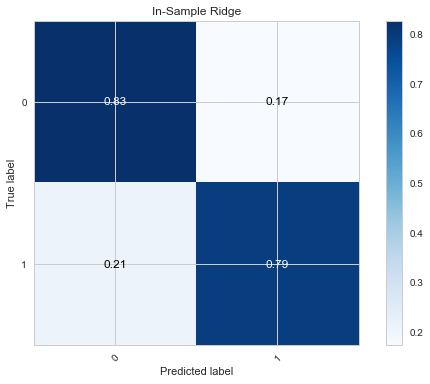

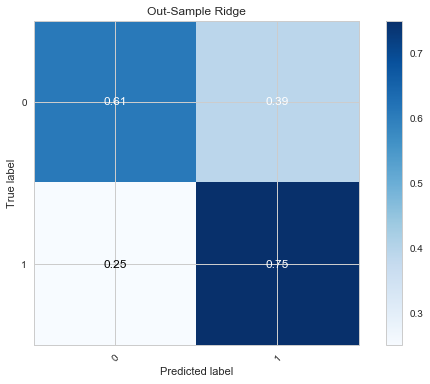

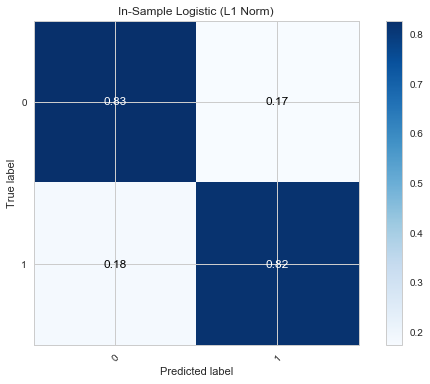

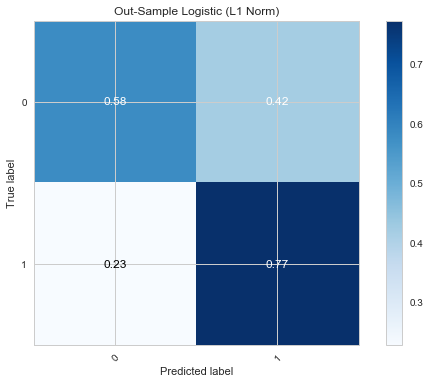

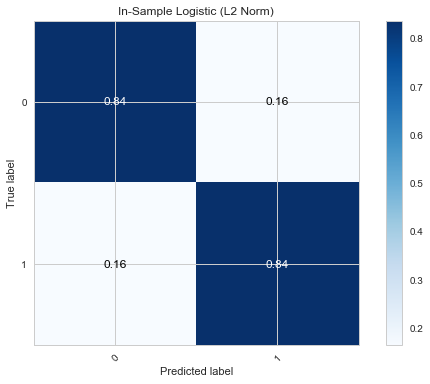

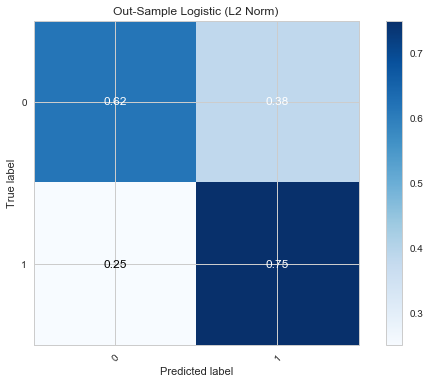

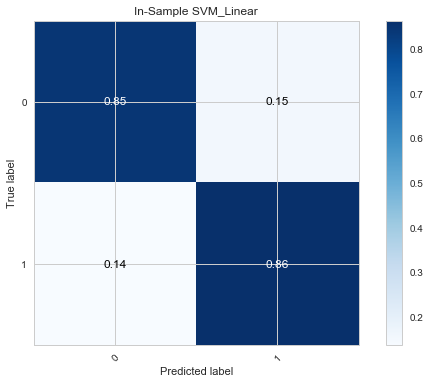

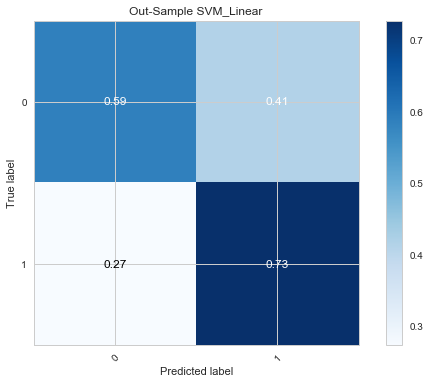

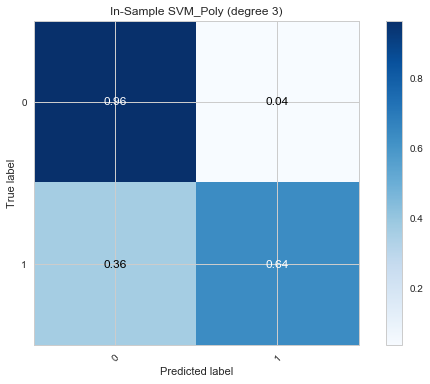

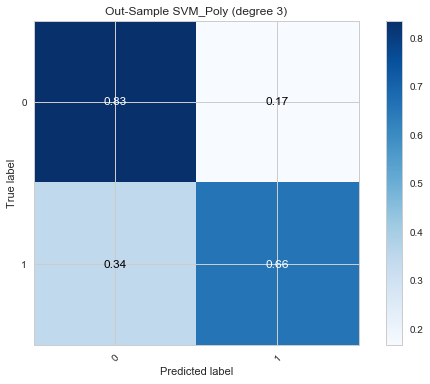

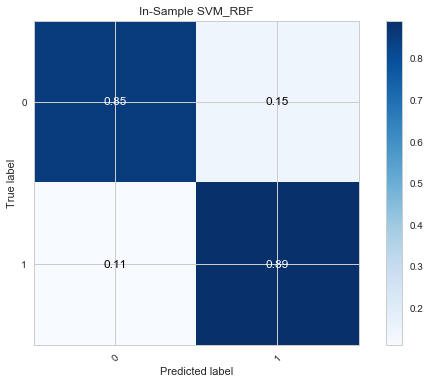

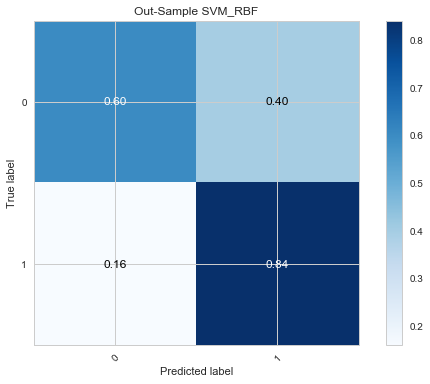

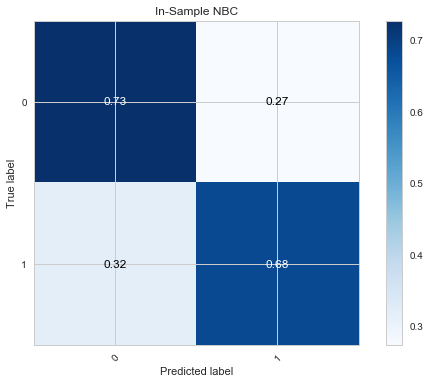

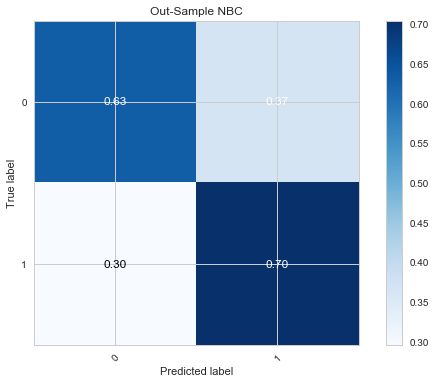

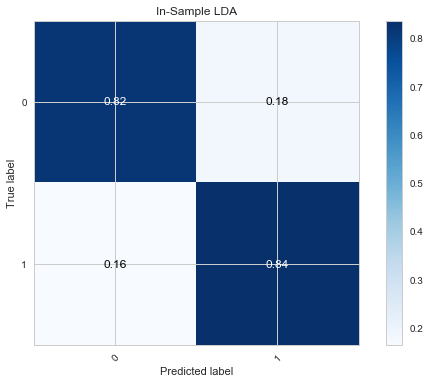

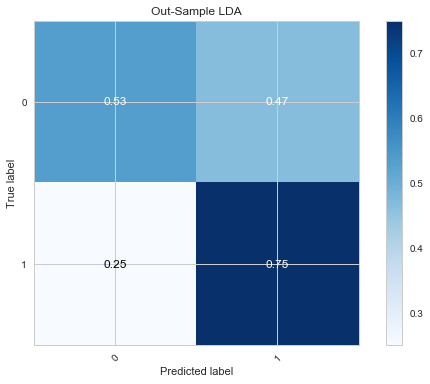

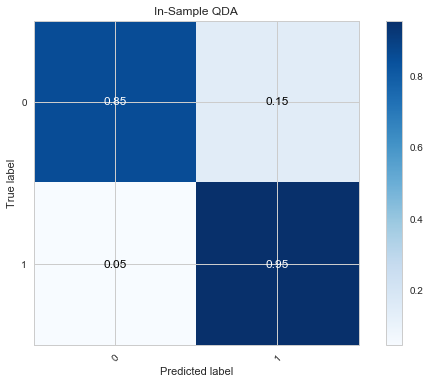

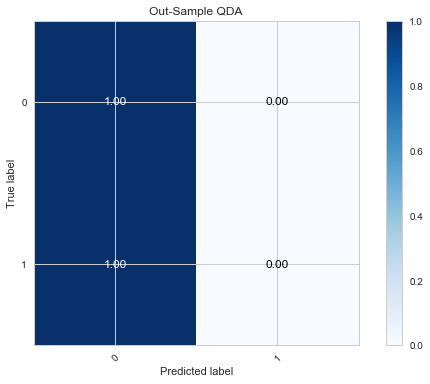

In [86]:
for idx in range(len(classifiers)):
    clf = classifiers[idx]

    y_train_pred = clf.predict(X_train_std)
    y_test_pred = clf.predict(X_test_std)

    plot_confusion_matrix(y_true=y_train, y_pred=y_train_pred, classes=np.array([0, 1]), normalize=True,
                          title='In-Sample %s' % classifier_names[idx])
    plot_confusion_matrix(y_true=y_test, y_pred=y_test_pred, classes=np.array([0, 1]), normalize=True,
                          title='Out-Sample %s' % classifier_names[idx])

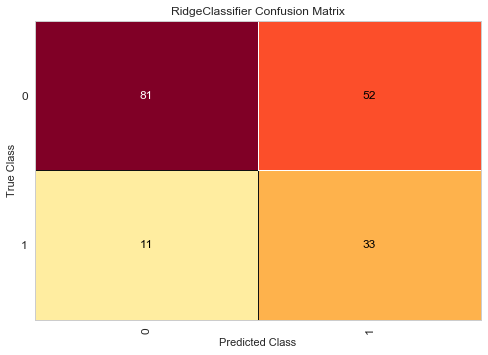

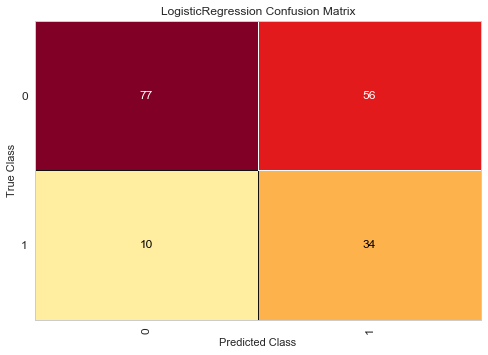

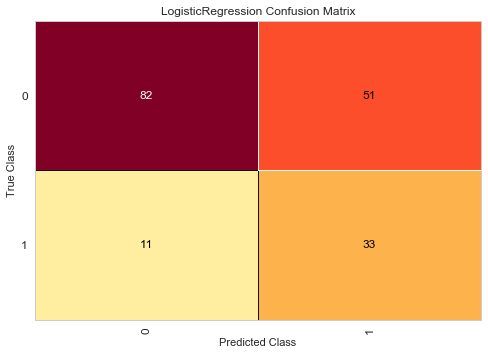

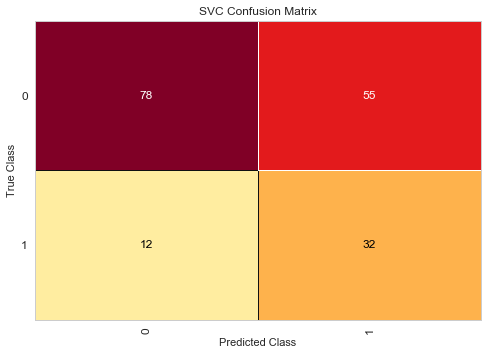

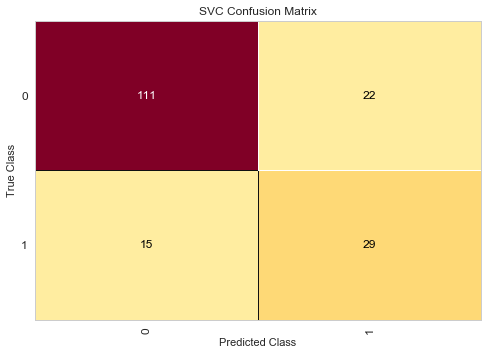

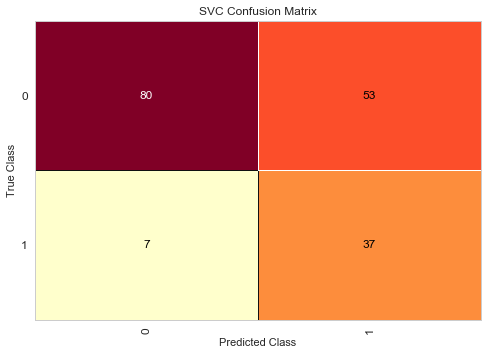

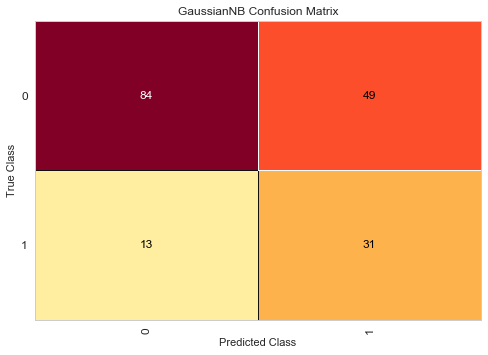

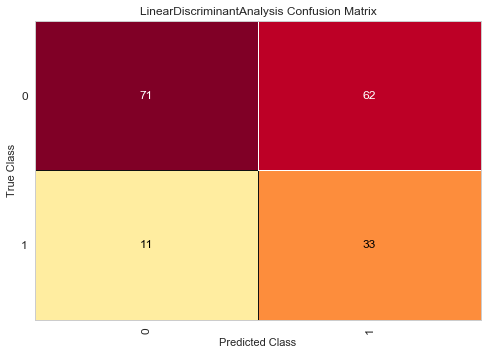

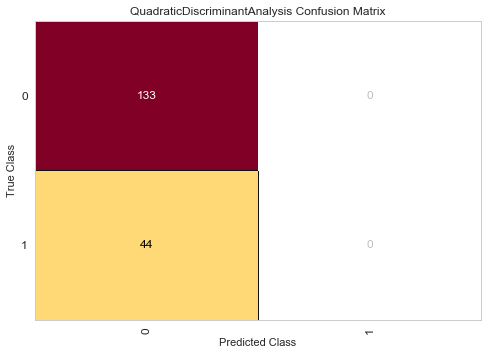

In [87]:
from yellowbrick.classifier import ConfusionMatrix

for idx in range(len(classifiers)):
    clf = classifiers[idx]

    cm = ConfusionMatrix(clf, classes=[0, 1])

    plt.figure()
    cm.score(X_test_std, y_test)
    cm.poof()
    cm.set_title(title=classifier_names[idx])

In [88]:
# y_score_df.to_csv('y_score_%d_years.csv' % year)
